### Load libraries

In [56]:
#Import neccessay libraries
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import math
import numpy as np

### Load dataset

In [57]:
#load dataset
filename = 'wheather_data.csv'
df = pd.read_csv(filename)

# convert string timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], format = '%Y-%m-%d %H:%M:%S')
#df['timestamp'] = datetime.strptime(df['timestamp'], '%y-%m-%d %H:%M:%S')

#check the structiure of the dataset
print('Dataset shape: '+str(df.shape)+'\n')
print(df.info())

#sort based on the id column
df = df.sort_values('id')

print(df.head(10))

Dataset shape: (406719, 7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406719 entries, 0 to 406718
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   id             406719 non-null  int64         
 1   timestamp      406719 non-null  datetime64[ns]
 2   value          406719 non-null  float64       
 3   identifier     406719 non-null  object        
 4   value_type_id  406719 non-null  int64         
 5   location_id    406719 non-null  float64       
 6   source_id      406719 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 21.7+ MB
None
       id           timestamp    value identifier  value_type_id  location_id  \
7  427433 2019-04-25 13:20:09     0.00        P1H             12         23.0   
2  427434 2019-04-25 13:20:09     0.00        P6H             13         23.0   
3  427435 2019-04-25 13:20:09     0.51       P24H             14

## Fisrt Part - Analyze and Preprocess the dataset


Min date: 2019-04-25 13:20:09, Max Date: 2019-07-29 23:40:08

There are 24 unique identifiers.

There are 5 unique locations in the dataset.
location id:  23.0
location id:  (126003, 7)
Min date: 2019-04-25 13:20:09, Max Date: 2019-07-29 23:40:07
location id:  27.0
location id:  (96668, 7)
Min date: 2019-06-06 09:20:11, Max Date: 2019-07-29 23:40:07
location id:  30.0
location id:  (128465, 7)
Min date: 2019-06-10 08:40:09, Max Date: 2019-07-29 23:40:08
location id:  116.0
location id:  (55563, 7)
Min date: 2019-07-08 16:20:08, Max Date: 2019-07-29 23:40:08
location id:  152.0
location id:  (20, 7)
Min date: 2019-07-23 11:20:10, Max Date: 2019-07-23 11:20:14

location: 23.0, indicators: 24
['P1H' 'P6H' 'P24H' 'PMSL' 'RH' 'T' 'TDP' 'UVI' 'WD' 'WS' 'CC' 'P3H' 'SM0'
 'SM30' 'SM100' 'ST0' 'PC' 'P' 'ETref' 'ETmodel' 'ST30' 'ST100' 'ST10'
 'pressureMeanSeaLevel']

location: 27.0, indicators: 24
['P1H' 'P6H' 'P24H' 'PMSL' 'RH' 'T' 'TDP' 'UVI' 'WD' 'WS' 'CC' 'SM0'
 'SM30' 'SM100' 'ST0' 'PC' '

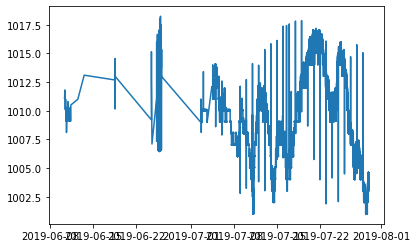

In [58]:
#check the time window of the dataset
print('\nMin date: {}, Max Date: {}'.format(df.timestamp.min(), df.timestamp.max() ))

# unique identifiers
unique_id = df.identifier.unique()
print('\nThere are {} unique identifiers.'.format(unique_id.size))
#print(unique_id)

# unique locations
unique_locations =  df.location_id.unique()
print('\nThere are {} unique locations in the dataset.'.format(unique_locations.size))
#print(unique_locations)

for id in unique_locations:
    t_id = df.loc[df['location_id'] == id]
    print('location id: ',id)
    print('location id: ',t_id.shape)
    print('Min date: {}, Max Date: {}'.format(t_id.timestamp.min(), t_id.timestamp.max() ))


#check each location the numer of unique identifiers
for location in unique_locations:
    print('\nlocation: {}, indicators: {}'.format(location,df[df.location_id == location].identifier.unique().size))
    print(df[df.location_id == location].identifier.unique())

    
#check for duplicates 
print('\n There are {} rows which are duplicated grouped by timestamp,identifier,location_id'.format(df.duplicated(subset=['timestamp','value','identifier','location_id']).sum()))

# from an identidier, check the timeserie
x = df.loc[(df['location_id'] == 30.0) & (df['identifier'] == 'PMSL')]
plt.plot(x['timestamp'], x['value'])

###  Preprocessing the dataset
* Find the number of observations of each identofoer and the Min and Max value of each.

Identifier P1H has 109725 rows, max value: 6.68, min value: 0.0, mean value: 0.03

Identifier P6H has 73108 rows, max value: 15.75, min value: 0.0, mean value: 0.19

Identifier P24H has 73101 rows, max value: 27.18, min value: 0.0, mean value: 0.76

Identifier PMSL has 334369 rows, max value: 1021.9, min value: 1001.0, mean value: 1011.82

Identifier RH has 334523 rows, max value: 100.0, min value: 0.17, mean value: 48.33

Identifier T has 334530 rows, max value: 310.79, min value: 6.0, mean value: 64.5

Identifier TDP has 109732 rows, max value: 21.7, min value: 4.0, mean value: 13.49

Identifier UVI has 286853 rows, max value: 11.0, min value: 0.0, mean value: 2.47

Identifier WD has 331177 rows, max value: 360.0, min value: 0.0, mean value: 147.06

Identifier WS has 334194 rows, max value: 43.0, min value: 0.0, mean value: 7.27

Identifier CC has 83916 rows, max value: 100.0, min value: 0.0, mean value: 8.82

Identifier P3H has 742 rows, max value: 5.375, min value: 0.062, mean valu

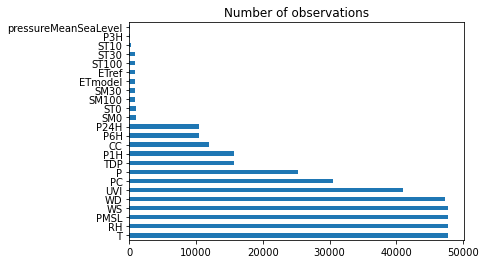

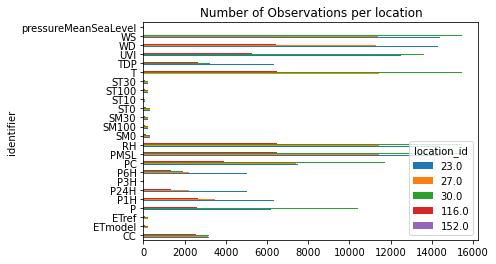

In [59]:
for id in unique_id:
    num_rows = df[df.identifier == id].size
    max_value = df[df.identifier == id].value.max()
    min_value = df[df.identifier == id].value.min()
    mean_value = round(df[df.identifier == id].value.mean(),2)
    print('Identifier {} has {} rows, max value: {}, min value: {}, mean value: {}\n'.format(id,num_rows,max_value,min_value,mean_value))
    
df['identifier'].value_counts().plot(kind='barh',title = 'Number of observations')


pd.crosstab(df['identifier'],
            df['location_id']).plot(kind='barh', title = 'Number of Observations per location')

df['timestamp'] = pd.to_datetime(df['timestamp'])


##### Investigating the dataset you can found that : 
* The time period is from 2019-04-25 13:20:09 until 2019-07-29 23:40:08
* The dataset has 406719 records
* There are no missing values.
* Some sample intervals are every 20 minute.
* The 152.0 location has only 20 records, so it would be dropped from the data. 
* There are 24 unique identifiers which are present only in four location. The fifth location(152.0) has only 12.
* There is no equal amount of sample rate between identifiers and locations.
* There are duplicates rows based on the timestamp, value, identifier and location_id

#### Actions that we will be made in pre-process

* The 152. location will be dropped.
* Drop the duplicate values based on the timestamp, value, identifier and location_id.
* Will keep only the identifiers with the most observations.
* The observation period is 3 months, so we dont have a full picture of the sesonal obsevations. Thus the year, month will be dropped. To keep the cylical data, the time will be kept and transform to cylical data. 
* Based on the above decision the neural network would not be fed with time-serie like data(windowing, etc). The train data will be shuffled.  

In [60]:
## clear_data will be the processed dataset
clear_data = df

#drop 152.0 location from the data 
clear_data = df[df.location_id != 152.0]

#remove duplicates. Keep the last record
clear_data = clear_data.drop_duplicates(subset=['timestamp','value','identifier','location_id'], keep='last')

# keep columns that 
# keep_columns = ['WS','WD','T','UVI','TDP','RH','PMSL','PC','P']
keep_columns = ['T','RH','PMSL','WS','WD','UVI']


clear_data = clear_data.loc[clear_data['identifier'].isin(keep_columns)]

## Tranform timestamp to numeric 
## We need to transform the timestamp to numric so we can feed it to our NN. 
## Since we don't have continous timeseries(based on the timestamp), 
## but we know the feaatures contain periodicity. 
## Thus we have to need to transform them into cylical data. 



clear_data['day'] = clear_data['timestamp'].dt.day
clear_data['month'] = clear_data['timestamp'].dt.month

# Convert the time with sin and cos 
clear_data['seconds'] = ((pd.to_datetime(clear_data['timestamp']).dt.hour) * 3600) + ((pd.to_datetime(clear_data['timestamp']).dt.minute) * 60) + (pd.to_datetime(df['timestamp']).dt.second)

# apply cos and sin into the seconds
seconds_in_day = 24*60*60
clear_data['sin_time'] = np.sin(2*np.pi*clear_data['seconds']/seconds_in_day)
clear_data['cos_time'] = np.cos(2*np.pi*clear_data['seconds']/seconds_in_day)


#standarize the dataset
# clear_data.value = clear_data.groupby('identifier')['value'].transform(lambda x: round((x - x.mean()) / x.std()))
clear_data.value = clear_data.groupby('identifier')['value'].transform(lambda x: round(abs(x - x.min()) / abs(x.max() - x.min())))



for id in unique_id:
    num_rows = clear_data[clear_data.identifier == id].size
    max_value = clear_data[clear_data.identifier == id].value.max()
    min_value = clear_data[clear_data.identifier == id].value.min()
    mean_value = round(clear_data[clear_data.identifier == id].value.mean(),2)
    print('Identifier {} has {} rows, max value: {}, min value: {}, mean value: {}\n'.format(id,num_rows,max_value,min_value,mean_value))
    

#shuffle dataset
clear_data.sample(frac=1).reset_index(drop=True)

#clear_data.head(10)


Identifier P1H has 0 rows, max value: nan, min value: nan, mean value: nan

Identifier P6H has 0 rows, max value: nan, min value: nan, mean value: nan

Identifier P24H has 0 rows, max value: nan, min value: nan, mean value: nan

Identifier PMSL has 536208 rows, max value: 1.0, min value: 0.0, mean value: 0.55

Identifier RH has 535452 rows, max value: 1.0, min value: 0.0, mean value: 0.49

Identifier T has 562872 rows, max value: 1.0, min value: 0.0, mean value: 0.14

Identifier TDP has 0 rows, max value: nan, min value: nan, mean value: nan

Identifier UVI has 352524 rows, max value: 1.0, min value: 0.0, mean value: 0.28

Identifier WD has 537564 rows, max value: 1.0, min value: 0.0, mean value: 0.38

Identifier WS has 477648 rows, max value: 1.0, min value: 0.0, mean value: 0.07

Identifier CC has 0 rows, max value: nan, min value: nan, mean value: nan

Identifier P3H has 0 rows, max value: nan, min value: nan, mean value: nan

Identifier SM0 has 0 rows, max value: nan, min value: na

,id,timestamp,value,identifier,value_type_id,location_id,source_id,day,month,seconds,sin_time,cos_time
0,5837719,2019-07-13 11:40:07,0.0,T,11,116.0,5,13,7,42007.0,0.086649,-0.996239
1,6067001,2019-07-18 06:02:13,0.0,RH,26,30.0,6,18,7,21733.0,0.999953,-0.009672
2,2551696,2019-06-25 15:03:23,0.0,RH,43,30.0,5,25,6,54203.0,-0.717468,-0.696591
3,459018,2019-04-27 11:40:09,1.0,WD,17,23.0,5,27,4,42009.0,0.086504,-0.996252
4,6099894,2019-07-19 00:06:26,1.0,RH,43,23.0,5,19,7,386.0,0.028067,0.999606
...,...,...,...,...,...,...,...,...,...,...,...,...
250184,6111831,2019-07-19 00:10:35,0.0,WD,41,30.0,5,19,7,635.0,0.046162,0.998934
250185,6046773,2019-07-18 00:03:57,1.0,UVI,40,23.0,5,18,7,237.0,0.017234,0.999851
250186,5550012,2019-07-04 15:01:22,0.0,RH,26,27.0,6,4,7,54082.0,-0.711311,-0.702878
250187,4311763,2019-06-25 22:45:25,0.0,WD,41,27.0,5,25,6,81925.0,-0.319717,0.947513


In [61]:
# replace the categorical columns 'location_id' and 'identifier' with numeric with dummies
df_location = pd.get_dummies(clear_data['location_id'])
df_identifier = pd.get_dummies(clear_data['identifier'])
clear_data = pd.concat([clear_data, df_location,df_identifier], axis=1)
clear_data.head(10)

#check the values
unique_id= clear_data.identifier.unique()
for id in unique_id:
    num_rows = clear_data[clear_data.identifier == id].size
    max_value = clear_data[clear_data.identifier == id].value.max()
    min_value = clear_data[clear_data.identifier == id].value.min()
    mean_value = round(clear_data[clear_data.identifier == id].value.mean(),2)
    print('Identifier {} has {} rows, max value: {}, min value: {}, mean value: {}\n'.format(id,num_rows,max_value,min_value,mean_value))

Identifier PMSL has 983048 rows, max value: 1.0, min value: 0.0, mean value: 0.55

Identifier RH has 981662 rows, max value: 1.0, min value: 0.0, mean value: 0.49

Identifier T has 1031932 rows, max value: 1.0, min value: 0.0, mean value: 0.14

Identifier UVI has 646294 rows, max value: 1.0, min value: 0.0, mean value: 0.28

Identifier WD has 985534 rows, max value: 1.0, min value: 0.0, mean value: 0.38

Identifier WS has 875688 rows, max value: 1.0, min value: 0.0, mean value: 0.07



## Second Part - Building the Neural Network
* The new columns will be used as input variables and the value column will be used as output More specifically, the input layer will have the below inputs neurons.<br>
  - 2 inputs for month and day,
  - 2 inputs for columns time_sin, time_cos, 
  - 9 inputs which each represent the identifier,
  - 4 inputs for locations.

In [62]:
# drop no neccessary columns
drop_col = ['id', 'timestamp','identifier','location_id','value_type_id','source_id','seconds']
clear_data = clear_data.drop(drop_col, axis=1)

print(clear_data.head(2))

# create the train data and test data
import tensorflow as tf
from sklearn.model_selection import train_test_split

#check the version of tensorflow
print("TensorFlow version:", tf.__version__)




# shuffle dataset
clear_data = clear_data.sample(frac=1).reset_index(drop=True)

Y = clear_data.pop('value') 
X = clear_data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

#print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)



   value  day  month  sin_time  cos_time  23.0  27.0  30.0  116.0  PMSL  RH  \
0    1.0   25      4 -0.342635 -0.939469     1     0     0      0     1   0   
9    1.0   25      4 -0.342635 -0.939469     1     0     0      0     0   1   

   T  UVI  WD  WS  
0  0    0   0   0  
9  0    0   0   0  
TensorFlow version: 2.10.0


Epoch 1/400
801/801 [==============================] - 2s 2ms/step - loss: 0.1867 - acc: 0.7024 - val_loss: 0.1731 - val_acc: 0.7335
Epoch 2/400
801/801 [==============================] - 1s 2ms/step - loss: 0.1731 - acc: 0.7339 - val_loss: 0.1678 - val_acc: 0.7422
Epoch 3/400
801/801 [==============================] - 1s 2ms/step - loss: 0.1676 - acc: 0.7432 - val_loss: 0.1607 - val_acc: 0.7549
Epoch 4/400
801/801 [==============================] - 1s 2ms/step - loss: 0.1649 - acc: 0.7479 - val_loss: 0.1582 - val_acc: 0.7578
Epoch 5/400
801/801 [==============================] - 2s 2ms/step - loss: 0.1632 - acc: 0.7501 - val_loss: 0.1563 - val_acc: 0.7637
Epoch 6/400
801/801 [==============================] - 1s 2ms/step - loss: 0.1617 - acc: 0.7519 - val_loss: 0.1549 - val_acc: 0.7605
Epoch 7/400
801/801 [==============================] - 2s 2ms/step - loss: 0.1600 - acc: 0.7547 - val_loss: 0.1542 - val_acc: 0.7653
Epoch 8/400
801/801 [==============================] - 2s 2ms/step - 

801/801 [==============================] - 1s 2ms/step - loss: 0.1437 - acc: 0.7797 - val_loss: 0.1369 - val_acc: 0.7922
Epoch 63/400
801/801 [==============================] - 2s 2ms/step - loss: 0.1437 - acc: 0.7800 - val_loss: 0.1370 - val_acc: 0.7908
Epoch 64/400
801/801 [==============================] - 2s 2ms/step - loss: 0.1434 - acc: 0.7799 - val_loss: 0.1360 - val_acc: 0.7925
Epoch 65/400
801/801 [==============================] - 2s 2ms/step - loss: 0.1435 - acc: 0.7801 - val_loss: 0.1385 - val_acc: 0.7862
Epoch 66/400
801/801 [==============================] - 1s 2ms/step - loss: 0.1433 - acc: 0.7807 - val_loss: 0.1360 - val_acc: 0.7925
Epoch 67/400
801/801 [==============================] - 2s 2ms/step - loss: 0.1434 - acc: 0.7803 - val_loss: 0.1363 - val_acc: 0.7921
Epoch 68/400
801/801 [==============================] - 2s 2ms/step - loss: 0.1434 - acc: 0.7805 - val_loss: 0.1363 - val_acc: 0.7916
Epoch 69/400
801/801 [==============================] - 2s 2ms/step - loss:

801/801 [==============================] - 2s 2ms/step - loss: 0.1413 - acc: 0.7832 - val_loss: 0.1344 - val_acc: 0.7944
Epoch 124/400
801/801 [==============================] - 2s 2ms/step - loss: 0.1413 - acc: 0.7836 - val_loss: 0.1339 - val_acc: 0.7962
Epoch 125/400
801/801 [==============================] - 2s 2ms/step - loss: 0.1414 - acc: 0.7832 - val_loss: 0.1358 - val_acc: 0.7935
Epoch 126/400
801/801 [==============================] - 2s 2ms/step - loss: 0.1412 - acc: 0.7834 - val_loss: 0.1346 - val_acc: 0.7945
Epoch 127/400
801/801 [==============================] - 2s 2ms/step - loss: 0.1413 - acc: 0.7822 - val_loss: 0.1336 - val_acc: 0.7962
Epoch 128/400
801/801 [==============================] - 2s 2ms/step - loss: 0.1411 - acc: 0.7831 - val_loss: 0.1341 - val_acc: 0.7956
Epoch 129/400
801/801 [==============================] - 2s 2ms/step - loss: 0.1411 - acc: 0.7843 - val_loss: 0.1342 - val_acc: 0.7955
Epoch 130/400
801/801 [==============================] - 2s 2ms/step 

Epoch 184/400
801/801 [==============================] - 1s 2ms/step - loss: 0.1402 - acc: 0.7846 - val_loss: 0.1334 - val_acc: 0.7938
Epoch 185/400
801/801 [==============================] - 1s 2ms/step - loss: 0.1397 - acc: 0.7847 - val_loss: 0.1343 - val_acc: 0.7933
Epoch 186/400
801/801 [==============================] - 2s 2ms/step - loss: 0.1398 - acc: 0.7857 - val_loss: 0.1331 - val_acc: 0.7961
Epoch 187/400
801/801 [==============================] - 2s 2ms/step - loss: 0.1402 - acc: 0.7849 - val_loss: 0.1344 - val_acc: 0.7940
Epoch 188/400
801/801 [==============================] - 2s 2ms/step - loss: 0.1397 - acc: 0.7855 - val_loss: 0.1331 - val_acc: 0.7957
Epoch 189/400
801/801 [==============================] - 2s 2ms/step - loss: 0.1404 - acc: 0.7847 - val_loss: 0.1330 - val_acc: 0.7973
Epoch 190/400
801/801 [==============================] - 2s 2ms/step - loss: 0.1401 - acc: 0.7849 - val_loss: 0.1328 - val_acc: 0.7960
Epoch 191/400
801/801 [==============================] 

801/801 [==============================] - 1s 2ms/step - loss: 0.1395 - acc: 0.7857 - val_loss: 0.1333 - val_acc: 0.7983
Epoch 245/400
801/801 [==============================] - 1s 2ms/step - loss: 0.1395 - acc: 0.7856 - val_loss: 0.1324 - val_acc: 0.7944
Epoch 246/400
801/801 [==============================] - 1s 2ms/step - loss: 0.1397 - acc: 0.7843 - val_loss: 0.1322 - val_acc: 0.7975
Epoch 247/400
801/801 [==============================] - 2s 2ms/step - loss: 0.1393 - acc: 0.7858 - val_loss: 0.1345 - val_acc: 0.7939
Epoch 248/400
801/801 [==============================] - 2s 2ms/step - loss: 0.1393 - acc: 0.7858 - val_loss: 0.1359 - val_acc: 0.7917
Epoch 249/400
801/801 [==============================] - 2s 2ms/step - loss: 0.1391 - acc: 0.7854 - val_loss: 0.1330 - val_acc: 0.7967
Epoch 250/400
801/801 [==============================] - 2s 2ms/step - loss: 0.1396 - acc: 0.7853 - val_loss: 0.1350 - val_acc: 0.7954
Epoch 251/400
801/801 [==============================] - 2s 2ms/step 

Epoch 305/400
801/801 [==============================] - 2s 2ms/step - loss: 0.1385 - acc: 0.7876 - val_loss: 0.1349 - val_acc: 0.7944
Epoch 306/400
801/801 [==============================] - 2s 2ms/step - loss: 0.1386 - acc: 0.7874 - val_loss: 0.1324 - val_acc: 0.7972
Epoch 307/400
801/801 [==============================] - 2s 2ms/step - loss: 0.1385 - acc: 0.7878 - val_loss: 0.1345 - val_acc: 0.7942
Epoch 308/400
801/801 [==============================] - 2s 2ms/step - loss: 0.1388 - acc: 0.7869 - val_loss: 0.1321 - val_acc: 0.7978
Epoch 309/400
801/801 [==============================] - 2s 2ms/step - loss: 0.1385 - acc: 0.7873 - val_loss: 0.1347 - val_acc: 0.7955
Epoch 310/400
801/801 [==============================] - 2s 2ms/step - loss: 0.1391 - acc: 0.7867 - val_loss: 0.1364 - val_acc: 0.7923
Epoch 311/400
801/801 [==============================] - 2s 2ms/step - loss: 0.1389 - acc: 0.7868 - val_loss: 0.1339 - val_acc: 0.7961
Epoch 312/400
801/801 [==============================] 

801/801 [==============================] - 2s 2ms/step - loss: 0.1384 - acc: 0.7879 - val_loss: 0.1341 - val_acc: 0.7950
Epoch 366/400
801/801 [==============================] - 1s 2ms/step - loss: 0.1386 - acc: 0.7873 - val_loss: 0.1344 - val_acc: 0.7911
Epoch 367/400
801/801 [==============================] - 2s 2ms/step - loss: 0.1385 - acc: 0.7876 - val_loss: 0.1329 - val_acc: 0.7954
Epoch 368/400
801/801 [==============================] - 2s 2ms/step - loss: 0.1383 - acc: 0.7879 - val_loss: 0.1320 - val_acc: 0.7987
Epoch 369/400
801/801 [==============================] - 1s 2ms/step - loss: 0.1388 - acc: 0.7882 - val_loss: 0.1322 - val_acc: 0.7987
Epoch 370/400
801/801 [==============================] - 1s 2ms/step - loss: 0.1384 - acc: 0.7879 - val_loss: 0.1325 - val_acc: 0.7963
Epoch 371/400
801/801 [==============================] - 2s 2ms/step - loss: 0.1395 - acc: 0.7870 - val_loss: 0.1328 - val_acc: 0.7967
Epoch 372/400
801/801 [==============================] - 2s 2ms/step 

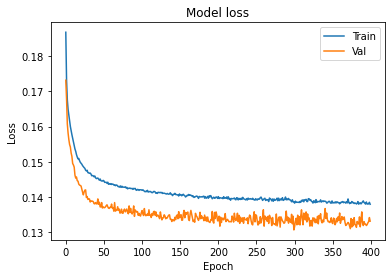

In [73]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

#input layer length
in_n = len(clear_data.axes[1])


#create model
model = Sequential([
    Dense(36, activation='sigmoid', input_shape=(in_n,)),
    Dropout(.2),
    Dense(56, activation='sigmoid'),
    Dropout(.2),
    Dense(24, activation='sigmoid'),
    #Dropout(.2),
    Dense(10, activation='sigmoid'),
    Dense(1, activation='sigmoid'),
])



opt = Adam(learning_rate=0.01)
loss = 'mse'

model.compile(optimizer=opt,
              loss=loss,
              metrics=['acc'])

#batch_size=200
hist = model.fit(X_train, Y_train, batch_size=250, epochs=400,validation_data=(X_test, Y_test)) #,validation_steps=10


#plot loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()
